In [212]:
import pandas as pd
import numpy as np

In [213]:
# set max dispaly rows
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

# Class Incremental

In [214]:
# read keepers/class_incremental_single_guru-trials=5-batch_size=128_window_size=50-feb10.csv
df = pd.read_csv(
    "results/keepers/class_incremental_single_guru-trials=10-batch_size=128_window_size=50-feb11.csv"
)

In [215]:
df.columns = ["metric", "ensemble_name", "values"]
df.head()

,metric,ensemble_name,values
0,batch_test_acc-mean,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,batch_test_acc-std,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,batch_train_acc-mean,full-ensemble,"[0.9914, 0.9922, 0.9953, 0.9961, 0.9953, 0.995..."
3,batch_train_acc-std,full-ensemble,"[0.0107, 0.0086, 0.008, 0.0039, 0.0062, 0.0052..."
4,experience_test_acc-mean,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.9635]"


In [216]:
# Make a new df with only the rows where the metric is experience_test_acc-mean or experience_test_acc-std
experience_df = df[
    df.metric.isin(["experience_test_acc-mean", "experience_test_acc-std"])
]
experience_df.head(1000)

,metric,ensemble_name,values
4,experience_test_acc-mean,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.9635]"
5,experience_test_acc-std,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.0032]"
10,experience_test_acc-mean,random_better-accuracy_score-num_gurus-1,"[0.1812, 0.0154, 0.637, 0.4814, 0.3354]"
11,experience_test_acc-std,random_better-accuracy_score-num_gurus-1,"[0.2188, 0.0245, 0.3667, 0.3213, 0.3883]"
16,experience_test_acc-mean,random_better-accuracy_score-num_gurus-2,"[0.0, 0.0519, 0.28, 0.9046, 0.3565]"
17,experience_test_acc-std,random_better-accuracy_score-num_gurus-2,"[0.0, 0.1256, 0.3293, 0.1655, 0.2355]"
22,experience_test_acc-mean,random_better-accuracy_score-num_gurus-3,"[0.0, 0.0, 0.0003, 0.8677, 0.613]"
23,experience_test_acc-std,random_better-accuracy_score-num_gurus-3,"[0.0, 0.0, 0.0009, 0.1242, 0.1509]"
28,experience_test_acc-mean,random_better-accuracy_score-num_gurus-4,"[0.0, 0.0, 0.0, 0.971, 0.5387]"
29,experience_test_acc-std,random_better-accuracy_score-num_gurus-4,"[0.0, 0.0, 0.0, 0.0079, 0.1311]"


## Class Inc, per experience, for paper

In [217]:
# make a df including only rows containing max_diversity-accuracy, single_Net, LwF, EWC, SynapticIntelligence, StudentExpert
# get the df with rows containing those strings in the ensemble name
class_inc_paper_df = experience_df[
    experience_df.ensemble_name.str.contains(
        "max_diversity-accuracy|single_Net|LwF|EWC|SynapticIntelligence|StudentExpert|full-ensemble"
    )
]
class_inc_paper_df.head(1000)

,metric,ensemble_name,values
4,experience_test_acc-mean,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.9635]"
5,experience_test_acc-std,full-ensemble,"[0.0, 0.0, 0.0, 0.0, 0.0032]"
226,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-1,"[0.5217, 0.1179, 0.7717, 0.2797, 0.2539]"
227,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-1,"[0.3075, 0.1461, 0.2762, 0.2623, 0.3577]"
232,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-2,"[0.0, 0.0932, 0.0653, 0.7983, 0.6512]"
233,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-2,"[0.0, 0.1935, 0.169, 0.204, 0.1972]"
238,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-3,"[0.0, 0.0, 0.0004, 0.9301, 0.631]"
239,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-3,"[0.0, 0.0, 0.0011, 0.0617, 0.1712]"
244,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-4,"[0.0, 0.0, 0.0, 0.96, 0.6243]"
245,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-4,"[0.0, 0.0, 0.0, 0.0213, 0.1323]"


## Class Inc Avgs

In [218]:
avgs = pd.read_csv("results/keepers/class_inc_avgs-feb11.csv")
avgs.head(100)

,Unnamed: 0,name,mean,std
0,0,StudentExpert-num_gurus_train-1-num_gurus_test-1,0.905262,0.032498
1,1,StudentExpert-num_gurus_train-1-num_gurus_test-2,0.904355,0.016478
2,2,StudentExpert-num_gurus_train-1-num_gurus_test-3,0.885361,0.057675
3,3,StudentExpert-num_gurus_train-1-num_gurus_test-4,0.867720,0.067612
4,4,StudentExpert-num_gurus_train-2-num_gurus_test-1,0.852676,0.057707
5,5,StudentExpert-num_gurus_train-2-num_gurus_test-2,0.824712,0.077163
6,6,StudentExpert-num_gurus_train-2-num_gurus_test-4,0.801131,0.086362
7,7,StudentExpert-num_gurus_train-2-num_gurus_test-3,0.789590,0.086936
8,8,StudentExpert-num_gurus_train-3-num_gurus_test-1,0.689677,0.058760
9,9,StudentExpert-num_gurus_train-3-num_gurus_test-2,0.662738,0.075615


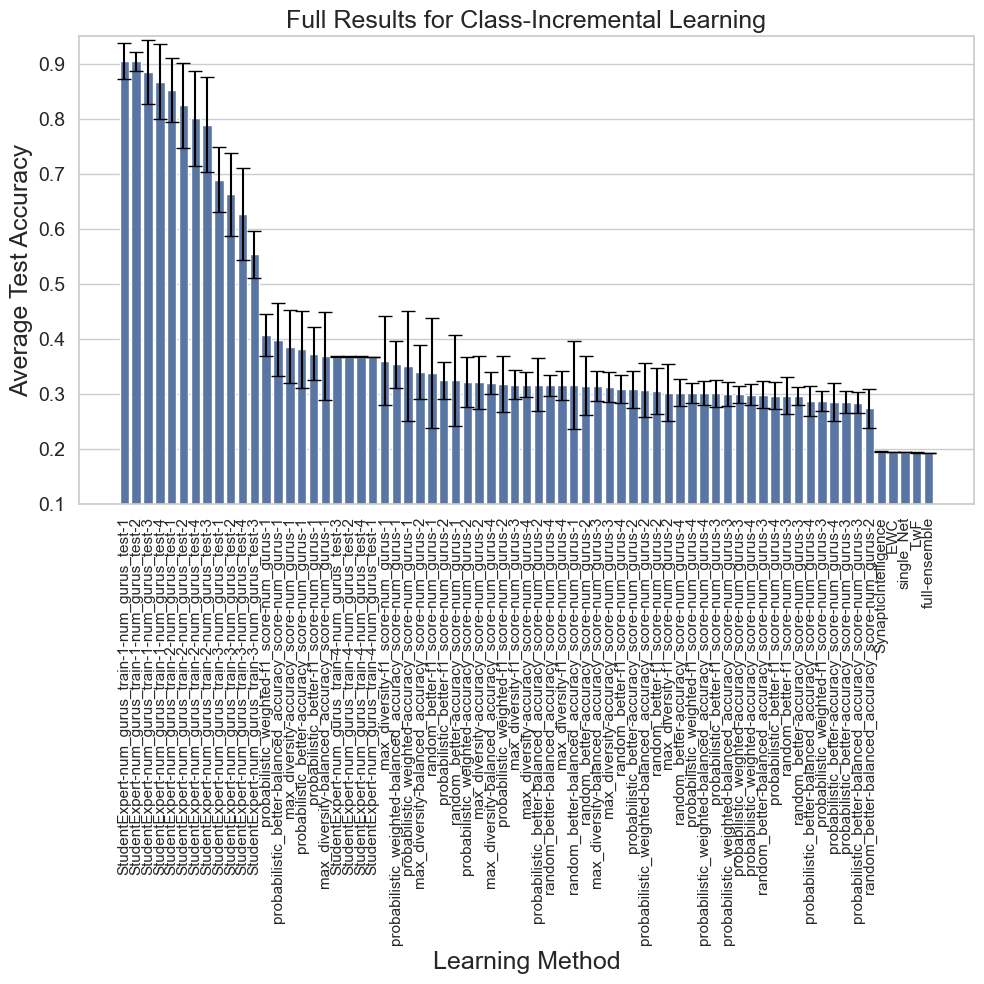

In [272]:
# plot avgs
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
ax = sns.barplot(x="name", y="mean", data=avgs)
# add error bars
plt.errorbar(
    range(len(avgs)), avgs["mean"], yerr=avgs["std"], fmt="none", c="black", capsize=5
)

# rotate x labels
plt.xticks(rotation=90)

plt.ylim(0.1, 0.95)

plt.xlabel("Learning Method", fontsize=18)
plt.ylabel("Average Test Accuracy", fontsize=18)

plt.xticks(fontsize=11)
plt.yticks(fontsize=14)

plt.title("Full Results for Class-Incremental Learning", fontsize=18)

plt.tight_layout()
plt.show()

# Class Inc Num Gurus

one_guru_mean: 0.36293636789884953 +- 0.07392474284577094
two_guru_mean: 0.3129418581493277 +- 0.04564483336337524
three_guru_mean: 0.2990860831756921 +- 0.023560150333460376
four_guru_mean: 0.304214801058794 +- 0.0240478612263199


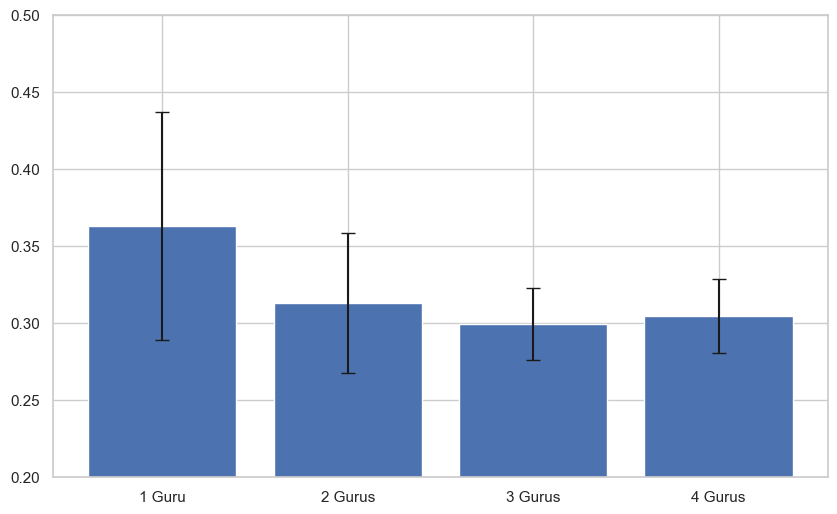

In [220]:
# get all rows of avgs where the name column ends in -1 or contains "train-1"
one_guru = avgs[avgs.name.str.endswith("-1")]
# get rid of all rows that contain StudentExpert
one_guru = one_guru[~one_guru.name.str.contains("StudentExpert")]
one_guru_mean = one_guru["mean"].mean()
# one_guru_std = one_guru["mean"].std()
one_guru_std = np.sqrt(np.mean(one_guru["std"] ** 2))

# get all rows of avgs where the name column ends in -2 or contains "train-2"
two_guru = avgs[avgs.name.str.contains("-2")]
# get rid of all rows that contain StudentExpert
two_guru = two_guru[~two_guru.name.str.contains("StudentExpert")]
two_guru_mean = two_guru["mean"].mean()
two_guru_std = np.sqrt(np.mean(two_guru["std"] ** 2))

# get all rows of avgs where the name column ends in -3 or contains "train-3"
three_guru = avgs[avgs.name.str.contains("-3|train-3")]
# get rid of all rows that contain StudentExpert
three_guru = three_guru[~three_guru.name.str.contains("StudentExpert")]
three_guru_mean = three_guru["mean"].mean()
# three_guru_std = three_guru["mean"].std()
three_guru_std = np.sqrt(np.mean(three_guru["std"] ** 2))

# get all rows of avgs where the name column ends in -4 or contains "train-4"
four_guru = avgs[avgs.name.str.contains("-4|train-4")]
# get rid of all rows that contain StudentExpert
four_guru = four_guru[~four_guru.name.str.contains("StudentExpert")]
four_guru_mean = four_guru["mean"].mean()
# four_guru_std = four_guru["mean"].std()
four_guru_std = np.sqrt(np.mean(four_guru["std"] ** 2))

print("one_guru_mean: {} +- {}".format(one_guru_mean, one_guru_std))
print("two_guru_mean: {} +- {}".format(two_guru_mean, two_guru_std))
print("three_guru_mean: {} +- {}".format(three_guru_mean, three_guru_std))
print("four_guru_mean: {} +- {}".format(four_guru_mean, four_guru_std))


# # plot the values
names = ["1 Guru", "2 Gurus", "3 Gurus", "4 Gurus"]
values = [one_guru_mean, two_guru_mean, three_guru_mean, four_guru_mean]
stds = [one_guru_std, two_guru_std, three_guru_std, four_guru_std]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.ylim(0.2, 0.5)
plt.show()

prob_better_mean:  0.320 +- 0.041
prob_weighted_mean:  0.321 +- 0.043
random_better_mean:  0.307 +- 0.052
max_diversity_mean:  0.331 +- 0.049


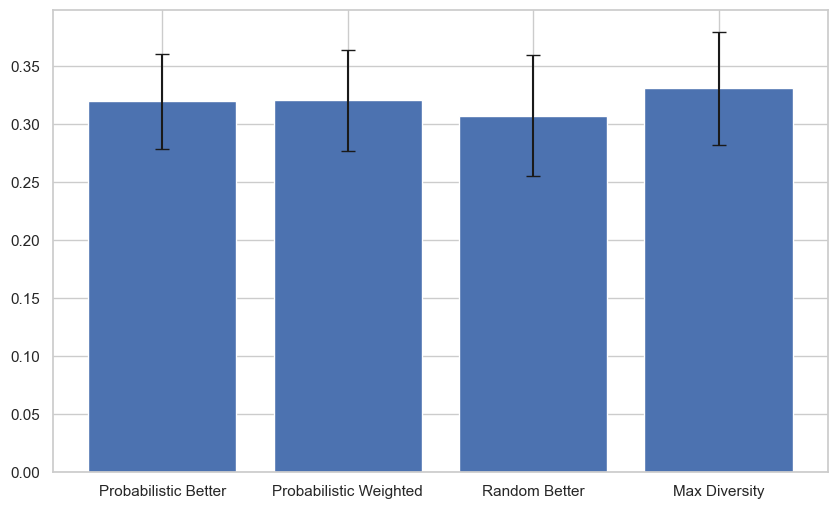

In [221]:
# get the mean of all rows containing "probabilistic-better" in avgs
prob_better_mean = np.mean(
    avgs[avgs["name"].str.contains("probabilistic_better")]["mean"]
)
prob_better_std = np.sqrt(
    np.mean(avgs[avgs["name"].str.contains("probabilistic_better")]["std"] ** 2)
)
print("prob_better_mean: ", f"{prob_better_mean:.3f}", "+-", f"{prob_better_std:.3f}")

prob_weighted_mean = np.mean(
    avgs[avgs["name"].str.contains("probabilistic_weighted")]["mean"]
)
prob_weighted_std = np.sqrt(
    np.mean(avgs[avgs["name"].str.contains("probabilistic_weighted")]["std"] ** 2)
)
print(
    "prob_weighted_mean: ",
    f"{prob_weighted_mean:.3f}",
    "+-",
    f"{prob_weighted_std:.3f}",
)


random_better_mean = np.mean(avgs[avgs["name"].str.contains("random_better")]["mean"])
random_better_std = np.sqrt(
    np.mean(avgs[avgs["name"].str.contains("random_better")]["std"] ** 2)
)

print(
    "random_better_mean: ",
    f"{random_better_mean:.3f}",
    "+-",
    f"{random_better_std:.3f}",
)

max_diversity_mean = np.mean(avgs[avgs["name"].str.contains("max_diversity")]["mean"])
max_diversity_std = np.sqrt(
    np.mean(avgs[avgs["name"].str.contains("max_diversity")]["std"] ** 2)
)
print(
    "max_diversity_mean: ",
    f"{max_diversity_mean:.3f}",
    "+-",
    f"{max_diversity_std:.3f}",
)

# plot the values
names = [
    "Probabilistic Better",
    "Probabilistic Weighted",
    "Random Better",
    "Max Diversity",
]
values = [prob_better_mean, prob_weighted_mean, random_better_mean, max_diversity_mean]
stds = [prob_better_std, prob_weighted_std, random_better_std, max_diversity_std]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()

accuracy_mean:  0.319 +- 0.049
balanced_accuracy_mean:  0.318 +- 0.044
f1_mean:  0.322 +- 0.046


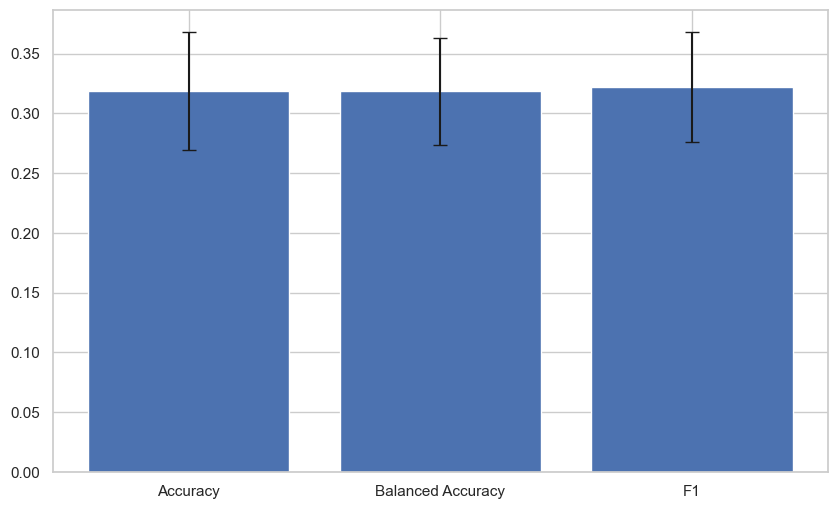

In [222]:
# get the mean of all rows containing "-accuracy" in avgs
accuracy_mean = np.mean(avgs[avgs["name"].str.contains("-accuracy")]["mean"])
accuracy_std = np.sqrt(
    np.mean(avgs[avgs["name"].str.contains("-accuracy")]["std"] ** 2)
)
print("accuracy_mean: ", f"{accuracy_mean:.3f}", "+-", f"{accuracy_std:.3f}")

balanced_accuracy_mean = np.mean(
    avgs[avgs["name"].str.contains("balanced_accuracy")]["mean"]
)
balanced_accuracy_std = np.sqrt(
    np.mean(avgs[avgs["name"].str.contains("balanced_accuracy")]["std"] ** 2)
)
print(
    "balanced_accuracy_mean: ",
    f"{balanced_accuracy_mean:.3f}",
    "+-",
    f"{balanced_accuracy_std:.3f}",
)

f1_mean = np.mean(avgs[avgs["name"].str.contains("f1")]["mean"])
f1_std = np.sqrt(np.mean(avgs[avgs["name"].str.contains("f1")]["std"] ** 2))
print("f1_mean: ", f"{f1_mean:.3f}", "+-", f"{f1_std:.3f}")

# plot the values
names = ["Accuracy", "Balanced Accuracy", "F1"]
values = [accuracy_mean, balanced_accuracy_mean, f1_mean]
stds = [accuracy_std, balanced_accuracy_std, f1_std]

plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.show()

one_test_mean: 0.7036672686750536 +- 0.04427054665484354
two_test_mean: 0.6898766448302194 +- 0.05464331002681209
three_test_mean: 0.6492394556404906 +- 0.05636618269933634
four_test_mean: 0.6657867439463735 +- 0.06889616090980923


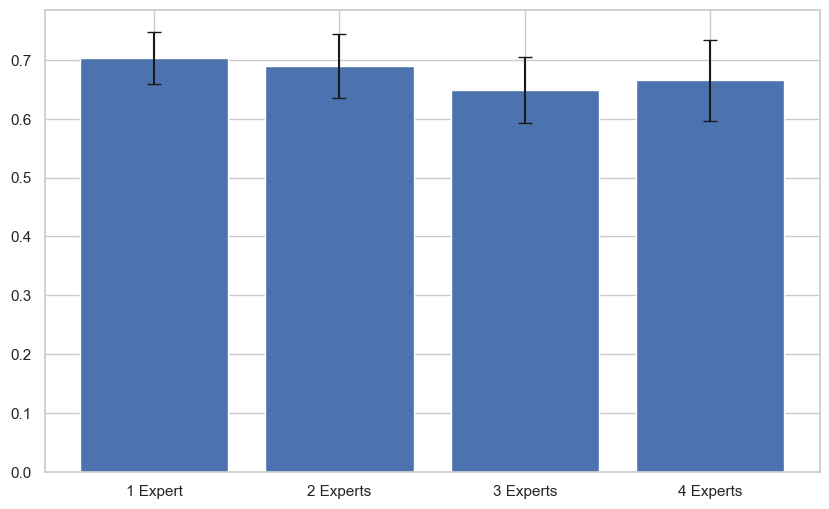

In [223]:
one_test = avgs[avgs.name.str.contains("test-1")]
one_test_mean = one_test["mean"].mean()
one_test_std = np.sqrt(np.mean(one_test["std"] ** 2))

two_test = avgs[avgs.name.str.contains("test-2")]
two_test_mean = two_test["mean"].mean()
two_test_std = np.sqrt(np.mean(two_test["std"] ** 2))

three_test = avgs[avgs.name.str.contains("test-3")]
three_test_mean = three_test["mean"].mean()
three_test_std = np.sqrt(np.mean(three_test["std"] ** 2))

four_test = avgs[avgs.name.str.contains("test-4")]
four_test_mean = four_test["mean"].mean()
four_test_std = np.sqrt(np.mean(four_test["std"] ** 2))

print("one_test_mean: {} +- {}".format(one_test_mean, one_test_std))
print("two_test_mean: {} +- {}".format(two_test_mean, two_test_std))
print("three_test_mean: {} +- {}".format(three_test_mean, three_test_std))
print("four_test_mean: {} +- {}".format(four_test_mean, four_test_std))

# plot the values
names = ["1 Expert", "2 Experts", "3 Experts", "4 Experts"]
values = [one_test_mean, two_test_mean, three_test_mean, four_test_mean]
stds = [one_test_std, two_test_std, three_test_std, four_test_std]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
# plt.ylim(0.2, 0.6)

plt.show()

# Domain Incremental

## Per Experience for paper

In [238]:
domain_inc_full_df = pd.read_csv("results/keepers/domain_incremental_single_guru-trials=10-batch_size=128_window_size=400-feb10.csv")

In [240]:
domain_experience_df = domain_inc_full_df[
    df.metric.isin(["experience_test_acc-mean", "experience_test_acc-std"])
]
domain_experience_df.head(1000)

,Unnamed: 0,ensemble_name,0
4,experience_test_acc-mean,full-ensemble,"[0.3192, 0.2118, 0.2844, 0.3504, 0.9578]"
5,experience_test_acc-std,full-ensemble,"[0.0145, 0.0081, 0.0206, 0.0117, 0.002]"
10,experience_test_acc-mean,random_better-accuracy_score-num_gurus-1,"[0.9101, 0.4195, 0.3866, 0.8491, 0.4034]"
11,experience_test_acc-std,random_better-accuracy_score-num_gurus-1,"[0.0121, 0.0558, 0.0801, 0.0147, 0.059]"
16,experience_test_acc-mean,random_better-accuracy_score-num_gurus-2,"[0.8981, 0.398, 0.4812, 0.8942, 0.5767]"
17,experience_test_acc-std,random_better-accuracy_score-num_gurus-2,"[0.0228, 0.1134, 0.1626, 0.0279, 0.0689]"
22,experience_test_acc-mean,random_better-accuracy_score-num_gurus-3,"[0.8104, 0.2982, 0.4527, 0.8927, 0.8467]"
23,experience_test_acc-std,random_better-accuracy_score-num_gurus-3,"[0.0239, 0.0861, 0.0747, 0.0178, 0.0293]"
28,experience_test_acc-mean,random_better-accuracy_score-num_gurus-4,"[0.6482, 0.2162, 0.39, 0.7917, 0.9424]"
29,experience_test_acc-std,random_better-accuracy_score-num_gurus-4,"[0.0577, 0.0183, 0.0644, 0.0647, 0.0071]"


In [241]:
domain_inc_paper_df = domain_experience_df[
    domain_experience_df.ensemble_name.str.contains(
        "max_diversity-accuracy|single_Net|LwF|EWC|SynapticIntelligence|StudentExpert|full-ensemble"
    )
]
domain_inc_paper_df.head(1000)

,Unnamed: 0,ensemble_name,0
4,experience_test_acc-mean,full-ensemble,"[0.3192, 0.2118, 0.2844, 0.3504, 0.9578]"
5,experience_test_acc-std,full-ensemble,"[0.0145, 0.0081, 0.0206, 0.0117, 0.002]"
226,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-1,"[0.8971, 0.4872, 0.4759, 0.8192, 0.4069]"
227,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-1,"[0.017, 0.0899, 0.1219, 0.0305, 0.0812]"
232,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-2,"[0.8445, 0.4545, 0.4953, 0.83, 0.7289]"
233,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-2,"[0.0731, 0.1039, 0.0888, 0.0697, 0.1047]"
238,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-3,"[0.6982, 0.3474, 0.4358, 0.785, 0.9138]"
239,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-3,"[0.0648, 0.0915, 0.0783, 0.0534, 0.0389]"
244,experience_test_acc-mean,max_diversity-accuracy_score-num_gurus-4,"[0.626, 0.219, 0.3795, 0.7729, 0.9444]"
245,experience_test_acc-std,max_diversity-accuracy_score-num_gurus-4,"[0.0616, 0.0187, 0.0614, 0.0603, 0.0047]"


In [279]:
domain_inc_df = pd.read_csv("results/keepers/domain_inc_avgs-feb11.csv")
domain_inc_df.head()
# drop Unnamed: 0
domain_inc_df = domain_inc_df.drop(columns=["Unnamed: 0"])

domain_inc_total_df = domain_inc_df.copy(deep=True)

In [280]:
# rename columns
domain_inc_df.columns = ["name", "mean", "std"]
# keep only "max_diversity-accuracy|single_Net|LwF|EWC|SynapticIntelligence|StudentExpert|full-ensemble"
domain_inc_df = domain_inc_df[
    domain_inc_df.name.str.contains(
        "max_diversity-accuracy|single_Net|LwF|EWC|SynapticIntelligence|StudentExpert|full-ensemble"
    )
]

domain_inc_df.head(100)

,name,mean,std
0,StudentExpert-num_train_gurus-2-num_test_gurus-3,0.883501,0.051841
1,StudentExpert-num_train_gurus-3-num_test_gurus-3,0.844343,0.058266
2,StudentExpert-num_train_gurus-2-num_test_gurus-1,0.839836,0.056683
3,StudentExpert-num_train_gurus-2-num_test_gurus-2,0.830827,0.048404
4,StudentExpert-num_train_gurus-2-num_test_gurus-4,0.824484,0.039430
5,StudentExpert-num_train_gurus-3-num_test_gurus-2,0.814652,0.048107
6,StudentExpert-num_train_gurus-1-num_test_gurus-1,0.803267,0.015773
7,StudentExpert-num_train_gurus-1-num_test_gurus-2,0.802929,0.017731
8,StudentExpert-num_train_gurus-3-num_test_gurus-1,0.792686,0.010137
9,StudentExpert-num_train_gurus-3-num_test_gurus-4,0.791954,0.022445


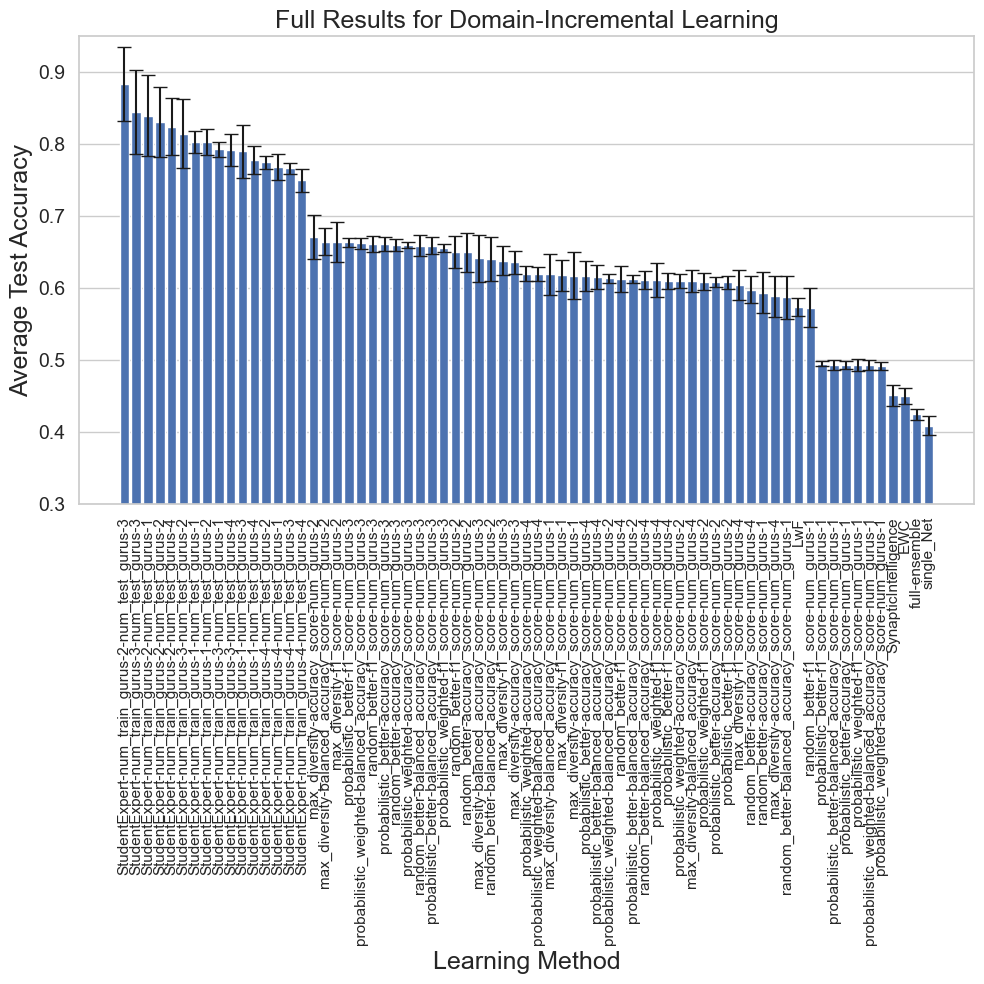

In [273]:
# plot the values
names = domain_inc_total_df["name"]
values = domain_inc_total_df["mean"]
stds = domain_inc_total_df["std"]
plt.figure(figsize=(10, 10))
plt.bar(names, values, yerr=stds, capsize=5)
plt.xticks(rotation=90)
plt.ylim(0.3, 0.95)

#increase the size of the x-axis labels
plt.xticks(fontsize=11)
plt.yticks(fontsize=14)

#increase the size of the xlabel and ylabel
plt.xlabel("Learning Method", fontsize=18)
plt.ylabel("Average Test Accuracy", fontsize=18)

plt.title("Full Results for Domain-Incremental Learning", fontsize=18)

#get rid of vertical grid lines
plt.grid(axis='x')
plt.tight_layout()
plt.show()

DI_one_guru_mean:  0.617 +- 0.033
DI_two_guru_mean:  0.671 +- 0.031
DI_three_guru_mean:  0.636 +- 0.016
DI_four_guru_mean:  0.588 +- 0.028


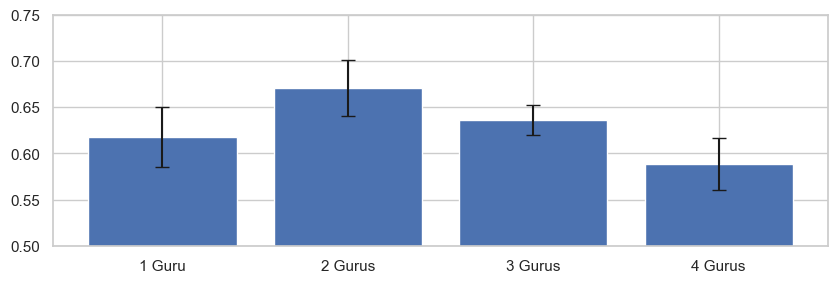

In [278]:
DI_one_guru = domain_inc_df[domain_inc_df.name.str.endswith("-1")]
# get rid of all rows that contain StudentExpert
DI_one_guru = DI_one_guru[~DI_one_guru.name.str.contains("StudentExpert")]
DI_one_guru_mean = DI_one_guru["mean"].mean()
DI_one_guru_std = np.sqrt(np.mean(DI_one_guru["std"] ** 2))

DI_two_guru = domain_inc_df[domain_inc_df.name.str.contains("-2")]
# get rid of all rows that contain StudentExpert
DI_two_guru = DI_two_guru[~DI_two_guru.name.str.contains("StudentExpert")]
DI_two_guru_mean = DI_two_guru["mean"].mean()
DI_two_guru_std = np.sqrt(np.mean(DI_two_guru["std"] ** 2))

DI_three_guru = domain_inc_df[domain_inc_df.name.str.contains("-3")]
# get rid of all rows that contain StudentExpert
DI_three_guru = DI_three_guru[~DI_three_guru.name.str.contains("StudentExpert")]
DI_three_guru_mean = DI_three_guru["mean"].mean()
DI_three_guru_std = np.sqrt(np.mean(DI_three_guru["std"] ** 2))

DI_four_guru = domain_inc_df[domain_inc_df.name.str.contains("-4")]
# get rid of all rows that contain StudentExpert
DI_four_guru = DI_four_guru[~DI_four_guru.name.str.contains("StudentExpert")]
DI_four_guru_mean = DI_four_guru["mean"].mean()
DI_four_guru_std = np.sqrt(np.mean(DI_four_guru["std"] ** 2))

print("DI_one_guru_mean: ", f"{DI_one_guru_mean:.3f}", "+-", f"{DI_one_guru_std:.3f}")
print("DI_two_guru_mean: ", f"{DI_two_guru_mean:.3f}", "+-", f"{DI_two_guru_std:.3f}")
print(
    "DI_three_guru_mean: ",
    f"{DI_three_guru_mean:.3f}",
    "+-",
    f"{DI_three_guru_std:.3f}",
)
print(
    "DI_four_guru_mean: ", f"{DI_four_guru_mean:.3f}", "+-", f"{DI_four_guru_std:.3f}"
)

# plot the values
names = ["1 Guru", "2 Gurus", "3 Gurus", "4 Gurus"]
values = [DI_one_guru_mean, DI_two_guru_mean, DI_three_guru_mean, DI_four_guru_mean]
stds = [DI_one_guru_std, DI_two_guru_std, DI_three_guru_std, DI_four_guru_std]
plt.figure(figsize=(10, 3))
plt.bar(names, values, yerr=stds, capsize=5)

plt.ylim(0.5, 0.75)
plt.show()

prob_better_mean:  nan +- nan
prob_weighted_mean:  nan +- nan
random_better_mean:  nan +- nan
max_diversity_mean:  0.628 +- 0.028


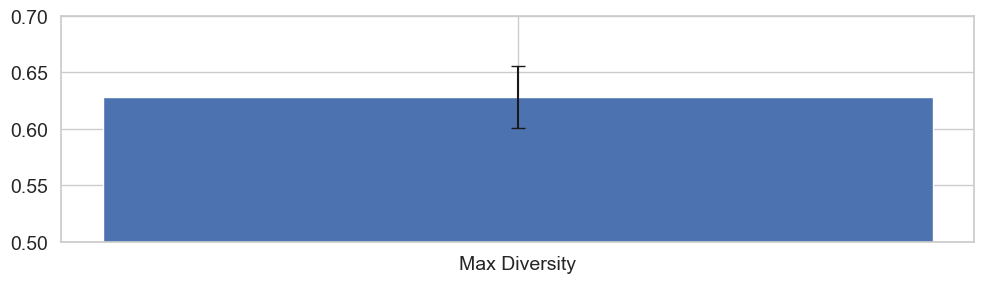

In [274]:
# get the mean of all rows containing "probabilistic-better" in domain_inc_df
DI_prob_better_mean = np.mean(
    domain_inc_df[domain_inc_full_df["name"].str.contains("probabilistic_better")]["mean"]
)
# calculate pooled standard deviation
DI_prob_better_std = np.sqrt(
    np.mean(
        domain_inc_df[domain_inc_df["name"].str.contains("probabilistic_better")]["std"]
        ** 2
    )
)
print("prob_better_mean: ", f"{DI_prob_better_mean:.3f}", "+-", f"{DI_prob_better_std:.3f}")

DI_prob_weighted_mean = np.mean(
    domain_inc_df[domain_inc_df["name"].str.contains("probabilistic_weighted")]["mean"]
)
DI_prob_weighted_std = np.sqrt(
    np.mean(
        domain_inc_df[domain_inc_df["name"].str.contains("probabilistic_weighted")][
            "std"
        ]
        ** 2
    )
)
print(
    "prob_weighted_mean: ",
    f"{DI_prob_weighted_mean:.3f}",
    "+-",
    f"{DI_prob_weighted_std:.3f}",
)

DI_random_better_mean = np.mean(
    domain_inc_df[domain_inc_df["name"].str.contains("random_better")]["mean"]
)
DI_random_better_std = np.sqrt(
    np.mean(
        domain_inc_df[domain_inc_df["name"].str.contains("random_better")]["std"] ** 2
    )
)

print(
    "random_better_mean: ",
    f"{DI_random_better_mean:.3f}",
    "+-",
    f"{DI_random_better_std:.3f}",
)

DI_max_diversity_mean = np.mean(
    domain_inc_df[domain_inc_df["name"].str.contains("max_diversity")]["mean"]
)
DI_max_diversity_std = np.sqrt(
    np.mean(
        domain_inc_df[domain_inc_df["name"].str.contains("max_diversity")]["std"] ** 2
    )
)
print(
    "max_diversity_mean: ",
    f"{DI_max_diversity_mean:.3f}",
    "+-",
    f"{DI_max_diversity_std:.3f}",
)

# plot the values
names = [
    "Probabilistic Better",
    "Probabilistic Weighted",
    "Random Better",
    "Max Diversity",
]
values = [DI_prob_better_mean, DI_prob_weighted_mean, DI_random_better_mean, DI_max_diversity_mean]
stds = [DI_prob_better_std, DI_prob_weighted_std, DI_random_better_std, DI_max_diversity_std]
plt.figure(figsize=(10, 3))
plt.bar(names, values, yerr=stds, capsize=5)
# increase font size of x labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.5, 0.7)

plt.tight_layout()
plt.show()

domain_one_test_mean: 0.8010749604430379 +- 0.03125077501267175
domain_two_test_mean: 0.8058119066455696 +- 0.03552860324392744
domain_three_test_mean: 0.8210368868670885 +- 0.04317244553188029
domain_four_test_mean: 0.7859745846518988 +- 0.026098699978751257


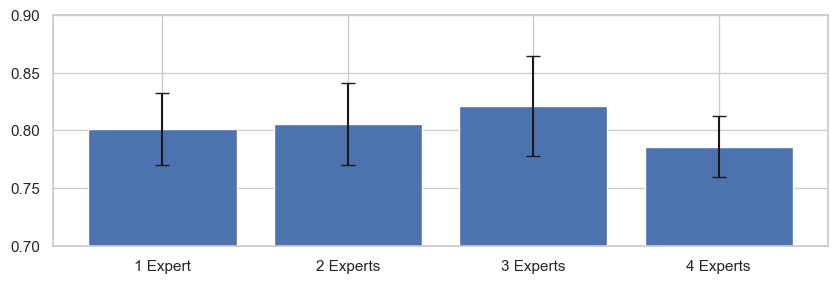

In [229]:
domain_one_test = domain_inc_df[domain_inc_df.name.str.contains("test_gurus-1")]
domain_one_test_mean = domain_one_test["mean"].mean()
domain_one_test_std = np.sqrt(np.mean(domain_one_test["std"] ** 2))

domain_two_test = domain_inc_df[domain_inc_df.name.str.contains("test_gurus-2")]
domain_two_test_mean = domain_two_test["mean"].mean()
domain_two_test_std = np.sqrt(np.mean(domain_two_test["std"] ** 2))

domain_three_test = domain_inc_df[domain_inc_df.name.str.contains("test_gurus-3")]
domain_three_test_mean = domain_three_test["mean"].mean()
domain_three_test_std = np.sqrt(np.mean(domain_three_test["std"] ** 2))

domain_four_test = domain_inc_df[domain_inc_df.name.str.contains("test_gurus-4")]
domain_four_test_mean = domain_four_test["mean"].mean()
domain_four_test_std = np.sqrt(np.mean(domain_four_test["std"] ** 2))

print(
    "domain_one_test_mean: {} +- {}".format(domain_one_test_mean, domain_one_test_std)
)
print(
    "domain_two_test_mean: {} +- {}".format(domain_two_test_mean, domain_two_test_std)
)
print(
    "domain_three_test_mean: {} +- {}".format(
        domain_three_test_mean, domain_three_test_std
    )
)
print(
    "domain_four_test_mean: {} +- {}".format(
        domain_four_test_mean, domain_four_test_std
    )
)

# plot the values
names = ["1 Expert", "2 Experts", "3 Experts", "4 Experts"]
values = [
    domain_one_test_mean,
    domain_two_test_mean,
    domain_three_test_mean,
    domain_four_test_mean,
]
stds = [
    domain_one_test_std,
    domain_two_test_std,
    domain_three_test_std,
    domain_four_test_std,
]
plt.figure(figsize=(10, 3))
plt.bar(names, values, yerr=stds, capsize=5)
plt.ylim(0.7, 0.9)
plt.show()

accuracy_mean:  0.611 +- 0.019
balanced_accuracy_mean:  0.613 +- 0.018
f1_mean:  0.611 +- 0.017


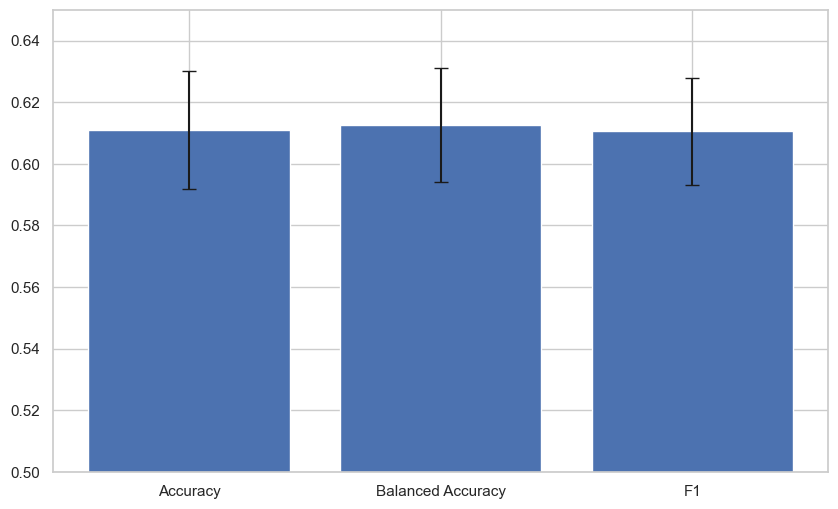

In [230]:
# get the mean of all rows containing "-accuracy" in domain_inc_df
accuracy_mean = np.mean(
    domain_inc_df[domain_inc_df["name"].str.contains("-accuracy")]["mean"]
)
accuracy_std = np.sqrt(
    np.mean(domain_inc_df[domain_inc_df["name"].str.contains("-accuracy")]["std"] ** 2)
)
print("accuracy_mean: ", f"{accuracy_mean:.3f}", "+-", f"{accuracy_std:.3f}")

balanced_accuracy_mean = np.mean(
    domain_inc_df[domain_inc_df["name"].str.contains("balanced_accuracy")]["mean"]
)
balanced_accuracy_std = np.sqrt(
    np.mean(
        domain_inc_df[domain_inc_df["name"].str.contains("balanced_accuracy")]["std"]
        ** 2
    )
)
print(
    "balanced_accuracy_mean: ",
    f"{balanced_accuracy_mean:.3f}",
    "+-",
    f"{balanced_accuracy_std:.3f}",
)

f1_mean = np.mean(domain_inc_df[domain_inc_df["name"].str.contains("f1")]["mean"])
f1_std = np.sqrt(
    np.mean(domain_inc_df[domain_inc_df["name"].str.contains("f1")]["std"] ** 2)
)
print("f1_mean: ", f"{f1_mean:.3f}", "+-", f"{f1_std:.3f}")

# plot the values
names = ["Accuracy", "Balanced Accuracy", "F1"]
values = [accuracy_mean, balanced_accuracy_mean, f1_mean]
stds = [accuracy_std, balanced_accuracy_std, f1_std]

plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.ylim(0.5, 0.65)
plt.show()

# Many Voters - Class Incremental

In [231]:
many_v_avgs = pd.read_csv("results/keepers/many_v_class_inc_avgs.csv")
many_v_avgs.head(100)

,Unnamed: 0,name,mean,std
0,0,max_diversity-accuracy_score-num_gurus-7,0.414054,0.054504
1,1,random_better-accuracy_score-num_gurus-7,0.408303,0.027402
2,2,probabilistic_weighted-accuracy_score-num_gurus-7,0.405260,0.054963
3,3,probabilistic_better-accuracy_score-num_gurus-7,0.395661,0.057738
4,4,max_diversity-accuracy_score-num_gurus-5,0.390898,0.082241
5,5,probabilistic_better-accuracy_score-num_gurus-5,0.389026,0.097200
6,6,probabilistic_weighted-accuracy_score-num_gurus-5,0.383110,0.086306
7,7,max_diversity-accuracy_score-num_gurus-3,0.373880,0.125588
8,8,random_better-accuracy_score-num_gurus-5,0.362347,0.077125
9,9,probabilistic_better-accuracy_score-num_gurus-3,0.345223,0.076108


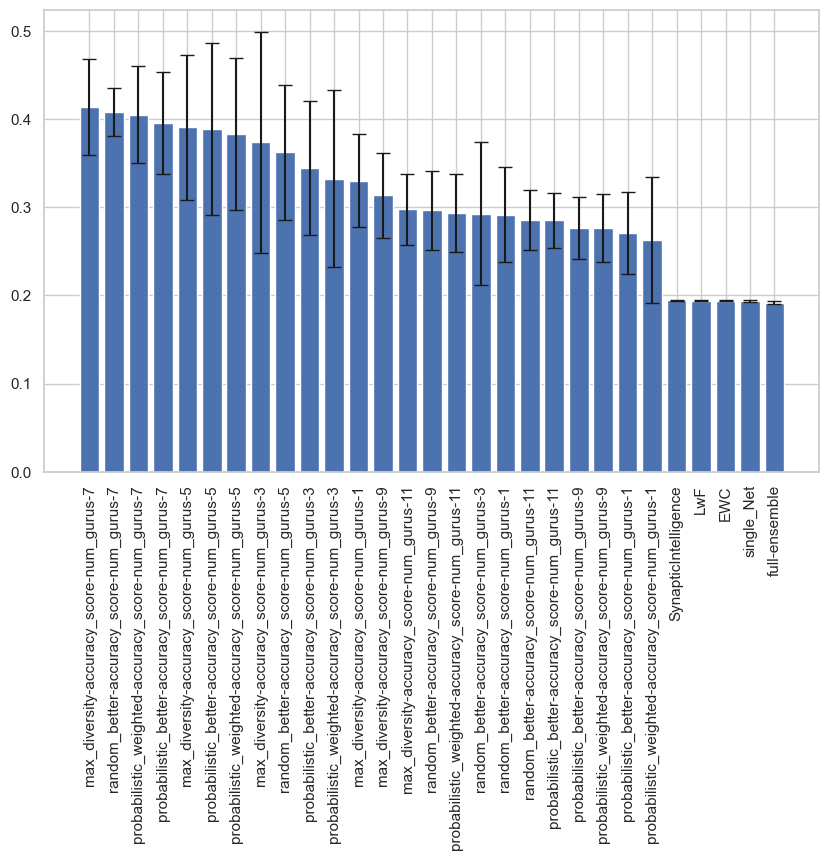

In [232]:
# remove Unnamed: 0
many_v_avgs = many_v_avgs.drop(columns=["Unnamed: 0"])

# rename columns
many_v_avgs.columns = ["name", "mean", "std"]

# plot the values
names = many_v_avgs["name"]
values = many_v_avgs["mean"]
stds = many_v_avgs["std"]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.xticks(rotation=90)
plt.show()

many_v_one_guru_mean:  0.289 +- 0.057
many_v_three_guru_mean:  0.336 +- 0.098
many_v_five_guru_mean:  0.381 +- 0.086
many_v_seven_guru_mean:  0.406 +- 0.050
many_v_nine_guru_mean:  0.291 +- 0.042
many_v_eleven_guru_mean:  0.291 +- 0.038


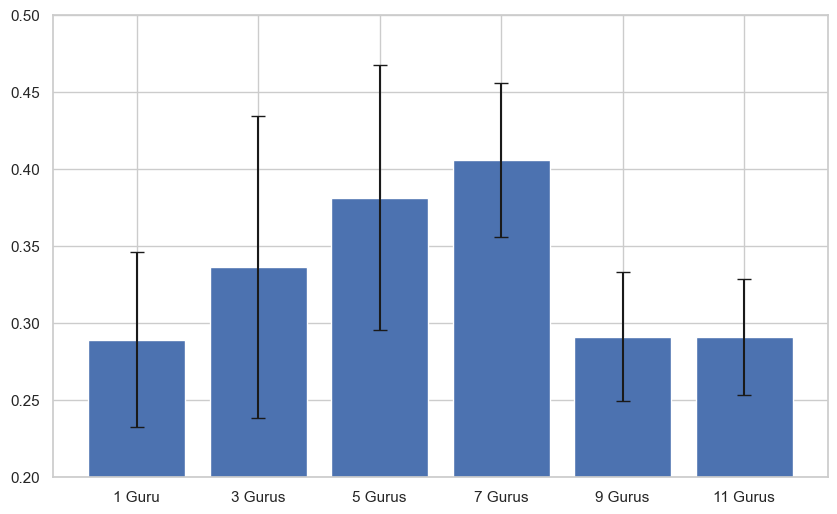

In [233]:
# get all rows of many_v_avgs where the name column ends in -1
many_v_one_guru = many_v_avgs[many_v_avgs.name.str.endswith("-1")]
many_v_one_guru_mean = many_v_one_guru["mean"].mean()
many_v_one_guru_std = np.sqrt(np.mean(many_v_one_guru["std"] ** 2))

# get all rows of many_v_avgs where the name column ends in -3
many_v_three_guru = many_v_avgs[many_v_avgs.name.str.endswith("-3")]
many_v_three_guru_mean = many_v_three_guru["mean"].mean()
many_v_three_guru_std = np.sqrt(np.mean(many_v_three_guru["std"] ** 2))

# get all rows of many_v_avgs where the name column ends in -5
many_v_five_guru = many_v_avgs[many_v_avgs.name.str.endswith("-5")]
many_v_five_guru_mean = many_v_five_guru["mean"].mean()
many_v_five_guru_std = np.sqrt(np.mean(many_v_five_guru["std"] ** 2))

# get all rows of many_v_avgs where the name column ends in -7
many_v_seven_guru = many_v_avgs[many_v_avgs.name.str.endswith("-7")]
many_v_seven_guru_mean = many_v_seven_guru["mean"].mean()
many_v_seven_guru_std = np.sqrt(np.mean(many_v_seven_guru["std"] ** 2))

# get all rows of many_v_avgs where the name column ends in -9
many_v_nine_guru = many_v_avgs[many_v_avgs.name.str.endswith("-9")]
many_v_nine_guru_mean = many_v_nine_guru["mean"].mean()
many_v_nine_guru_std = np.sqrt(np.mean(many_v_nine_guru["std"] ** 2))

# get all rows of many_v_avgs where the name column ends in -11
many_v_eleven_guru = many_v_avgs[many_v_avgs.name.str.endswith("-11")]
many_v_eleven_guru_mean = many_v_eleven_guru["mean"].mean()
many_v_eleven_guru_std = np.sqrt(np.mean(many_v_eleven_guru["std"] ** 2))

print(
    "many_v_one_guru_mean: ",
    f"{many_v_one_guru_mean:.3f}",
    "+-",
    f"{many_v_one_guru_std:.3f}",
)
print(
    "many_v_three_guru_mean: ",
    f"{many_v_three_guru_mean:.3f}",
    "+-",
    f"{many_v_three_guru_std:.3f}",
)
print(
    "many_v_five_guru_mean: ",
    f"{many_v_five_guru_mean:.3f}",
    "+-",
    f"{many_v_five_guru_std:.3f}",
)
print(
    "many_v_seven_guru_mean: ",
    f"{many_v_seven_guru_mean:.3f}",
    "+-",
    f"{many_v_seven_guru_std:.3f}",
)
print(
    "many_v_nine_guru_mean: ",
    f"{many_v_nine_guru_mean:.3f}",
    "+-",
    f"{many_v_nine_guru_std:.3f}",
)
print(
    "many_v_eleven_guru_mean: ",
    f"{many_v_eleven_guru_mean:.3f}",
    "+-",
    f"{many_v_eleven_guru_std:.3f}",
)

# plot the values
names = ["1 Guru", "3 Gurus", "5 Gurus", "7 Gurus", "9 Gurus", "11 Gurus"]
values = [
    many_v_one_guru_mean,
    many_v_three_guru_mean,
    many_v_five_guru_mean,
    many_v_seven_guru_mean,
    many_v_nine_guru_mean,
    many_v_eleven_guru_mean,
]
stds = [
    many_v_one_guru_std,
    many_v_three_guru_std,
    many_v_five_guru_std,
    many_v_seven_guru_std,
    many_v_nine_guru_std,
    many_v_eleven_guru_std,
]
plt.figure(figsize=(10, 6))
plt.bar(names, values, yerr=stds, capsize=5)
plt.ylim(0.2, 0.5)
plt.show()

# Paper Figs

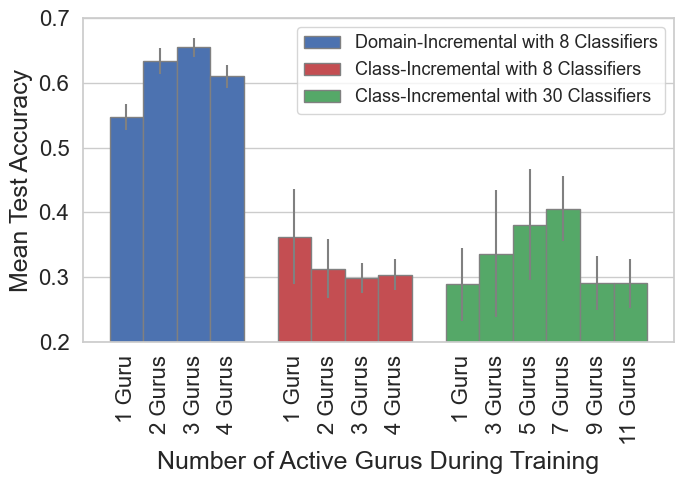

In [236]:
# A bar chart with three sets of bars. Each set should be in a different color
# The x-axis should have the following labels: "1 Guru", "2 Gurus", "3 Gurus", "4 Gurus" for the first group,
# "1 Guru", "2 Gurus", "3 Gurus", "4 Gurus" for the second group, and "1 Guru", "3 Gurus", "5 Gurus", "7 Gurus", "9 Gurus", "11 Gurus" for the third group
# The first group is for Domain-Incremental, the second group is for Class-Incremental, and the third group is for Class-Incremental with Many Classifiers

# The y-axis should be the mean accuracy: DI_one_guru_mean, DI_two_guru_mean, DI_three_guru_mean, DI_four_guru_mean for the first group, one_guru_mean, two_guru_mean, three_guru_mean, four_guru_mean for the second group, and many_v_one_guru_mean, many_v_three_guru_mean, many_v_five_guru_mean, many_v_seven_guru_mean, many_v_nine_guru_mean, many_v_eleven_guru_mean for the third group
# The error bars should be the standard deviation: DI_one_guru_std, DI_two_guru_std, DI_three_guru_std, DI_four_guru_std for the first group, one_guru_std, two_guru_std, three_guru_std, four_guru_std for the second group, and many_v_one_guru_std, many_v_three_guru_std, many_v_five_guru_std, many_v_seven_guru_std, many_v_nine_guru_std, many_v_eleven_guru_std for the third group

plt.figure(figsize=(7, 5))
barWidth = 1

bars1 = [DI_one_guru_mean, DI_two_guru_mean, DI_three_guru_mean, DI_four_guru_mean]
bars2 = [one_guru_mean, two_guru_mean, three_guru_mean, four_guru_mean]
bars3 = [
    many_v_one_guru_mean,
    many_v_three_guru_mean,
    many_v_five_guru_mean,
    many_v_seven_guru_mean,
    many_v_nine_guru_mean,
    many_v_eleven_guru_mean,
]

stds1 = [DI_one_guru_std, DI_two_guru_std, DI_three_guru_std, DI_four_guru_std]
stds2 = [one_guru_std, two_guru_std, three_guru_std, four_guru_std]
stds3 = [
    many_v_one_guru_std,
    many_v_three_guru_std,
    many_v_five_guru_std,
    many_v_seven_guru_std,
    many_v_nine_guru_std,
    many_v_eleven_guru_std,
]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + len(bars1) + 1 for x in range(len(bars2))]
r3 = [x + len(bars1) + len(bars2) + 2 for x in range(len(bars3))]

total_bars = len(bars1) + len(bars2) + len(bars3)

# Make the plot
plt.bar(
    r1, bars1, color="b", width=barWidth, edgecolor="grey", label="Domain-Incremental with 8 Classifiers", yerr=stds1, ecolor="grey"
)
plt.bar(
    r2, bars2, color="r", width=barWidth, edgecolor="grey", label="Class-Incremental with 8 Classifiers", yerr=stds2, ecolor="grey"
)
plt.bar(
    r3,
    bars3,
    color="g",
    width=barWidth,
    edgecolor="grey",
    label="Class-Incremental with 30 Classifiers",
    yerr=stds3,
    ecolor="grey",
)

# Create names on the x-axis. One name for each bar in the first group, two names for each bar in the second group, and one name for each bar in the third group
names = [
    "1 Guru",
    "2 Gurus",
    "3 Gurus",
    "4 Gurus",
    "",
    "1 Guru",
    "2 Gurus",
    "3 Gurus",
    "4 Gurus",
    "",
    "1 Guru",
    "3 Gurus",
    "5 Gurus",
    "7 Gurus",
    "9 Gurus",
    "11 Gurus",
]
x_tick_locations = np.arange(total_bars+2)
plt.xticks(x_tick_locations, names, rotation=90)

# remove vertical grid lines
plt.grid(axis="x")


# increase font size of x labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#increase the font size of the labels on the x-axis
plt.xlabel("Number of Active Gurus During Training", fontsize=18)
plt.ylabel("Mean Test Accuracy", fontsize=18)

# increase font size of legend
plt.legend(fontsize=13, loc="upper right")
plt.ylim(0.2, 0.7)

plt.tight_layout()
plt.show()

# Group Bars for Prob func

In [287]:
domain_inc_avgs = pd.read_csv("results/keepers/domain_inc_avgs-feb11.csv")
domain_inc_avgs = domain_inc_avgs.drop(columns=["Unnamed: 0"])
#drop all rows that contain StudentExpert
domain_inc_avgs = domain_inc_avgs[~domain_inc_avgs.name.str.contains("StudentExpert")]
domain_inc_avgs.head(1000)

,name,mean,std
16,max_diversity-accuracy_score-num_gurus-2,0.670651,0.030589
17,max_diversity-balanced_accuracy_score-num_gurus-2,0.664585,0.018940
18,max_diversity-f1_score-num_gurus-2,0.664399,0.027707
19,probabilistic_better-f1_score-num_gurus-3,0.663762,0.006345
20,probabilistic_weighted-balanced_accuracy_score...,0.662136,0.007635
21,random_better-f1_score-num_gurus-3,0.661739,0.011104
22,probabilistic_better-accuracy_score-num_gurus-3,0.661102,0.009608
23,random_better-accuracy_score-num_gurus-3,0.660134,0.008646
24,probabilistic_weighted-accuracy_score-num_gurus-3,0.659792,0.004180
25,random_better-balanced_accuracy_score-num_gurus-3,0.659108,0.014876


In [288]:
class_inc_avgs = pd.read_csv("results/keepers/class_inc_avgs-feb11.csv")
class_inc_avgs = class_inc_avgs.drop(columns=["Unnamed: 0"])
#drop all rows that contain StudentExpert
class_inc_avgs = class_inc_avgs[~class_inc_avgs.name.str.contains("StudentExpert")]
class_inc_avgs.head(1000)

,name,mean,std
12,probabilistic_weighted-f1_score-num_gurus-1,0.406579,0.038278
13,probabilistic_better-balanced_accuracy_score-n...,0.398038,0.066399
14,max_diversity-accuracy_score-num_gurus-1,0.385853,0.066100
15,probabilistic_better-accuracy_score-num_gurus-1,0.380708,0.070415
16,probabilistic_better-f1_score-num_gurus-1,0.373004,0.048022
17,max_diversity-balanced_accuracy_score-num_gurus-1,0.368173,0.080091
22,max_diversity-f1_score-num_gurus-1,0.359940,0.080968
23,probabilistic_weighted-balanced_accuracy_score...,0.354004,0.042554
24,probabilistic_weighted-accuracy_score-num_gurus-1,0.350831,0.100019
25,max_diversity-balanced_accuracy_score-num_gurus-2,0.340174,0.048613


DI_random_better_mean:  0.625 +- 0.022
DI_max_diversity_mean:  0.631 +- 0.025
DI_prob_better_mean:  0.595 +- 0.011
DI_prob_weighted_mean:  0.595 +- 0.010

CI_random_better_mean:  0.307 +- 0.052
CI_max_diversity_mean:  0.331 +- 0.049
CI_prob_better_mean:  0.320 +- 0.041
CI_prob_weighted_mean:  0.321 +- 0.043


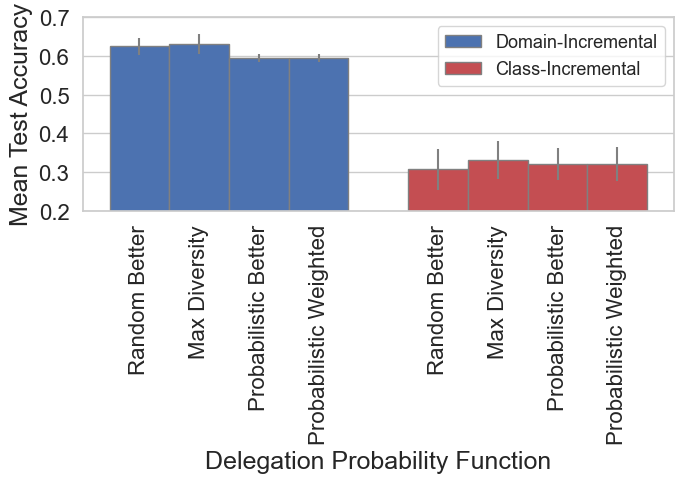

In [302]:
DI_random_better_mean = np.mean(
    domain_inc_avgs[domain_inc_avgs["name"].str.contains("random_better")]["mean"]
)
DI_random_better_std = np.sqrt(
    np.mean(
        domain_inc_avgs[domain_inc_avgs["name"].str.contains("random_better")]["std"] ** 2
    )
)
print(
    "DI_random_better_mean: ",
    f"{DI_random_better_mean:.3f}",
    "+-",
    f"{DI_random_better_std:.3f}",
)

DI_max_diversity_mean = np.mean(
    domain_inc_avgs[domain_inc_avgs["name"].str.contains("max_diversity")]["mean"]
)
DI_max_diversity_std = np.sqrt(
    np.mean(
        domain_inc_avgs[domain_inc_avgs["name"].str.contains("max_diversity")]["std"] ** 2
    )
)
print(
    "DI_max_diversity_mean: ",
    f"{DI_max_diversity_mean:.3f}",
    "+-",
    f"{DI_max_diversity_std:.3f}",
)

DI_prob_better_mean = np.mean(
    domain_inc_avgs[domain_inc_avgs["name"].str.contains("probabilistic_better")]["mean"]
)

DI_prob_better_std = np.sqrt(
    np.mean(
        domain_inc_avgs[domain_inc_avgs["name"].str.contains("probabilistic_better")]["std"]
        ** 2
    )
)
print("DI_prob_better_mean: ", f"{DI_prob_better_mean:.3f}", "+-", f"{DI_prob_better_std:.3f}")

DI_prob_weighted_mean = np.mean(
    domain_inc_avgs[domain_inc_avgs["name"].str.contains("probabilistic_weighted")]["mean"]
)
DI_prob_weighted_std = np.sqrt(
    np.mean(
        domain_inc_avgs[domain_inc_avgs["name"].str.contains("probabilistic_weighted")]["std"]
        ** 2
    )
)
print(
    "DI_prob_weighted_mean: ",
    f"{DI_prob_weighted_mean:.3f}",
    "+-",
    f"{DI_prob_weighted_std:.3f}",
)
print()

CI_random_better_mean = np.mean(
    class_inc_avgs[class_inc_avgs["name"].str.contains("random_better")]["mean"]
)
CI_random_better_std = np.sqrt(
    np.mean(
        class_inc_avgs[class_inc_avgs["name"].str.contains("random_better")]["std"] ** 2
    )
)
print(
    "CI_random_better_mean: ",
    f"{CI_random_better_mean:.3f}",
    "+-",
    f"{CI_random_better_std:.3f}",
)

CI_max_diversity_mean = np.mean(
    class_inc_avgs[class_inc_avgs["name"].str.contains("max_diversity")]["mean"]
)
CI_max_diversity_std = np.sqrt(
    np.mean(
        class_inc_avgs[class_inc_avgs["name"].str.contains("max_diversity")]["std"] ** 2
    )
)
print(
    "CI_max_diversity_mean: ",
    f"{CI_max_diversity_mean:.3f}",
    "+-",
    f"{CI_max_diversity_std:.3f}",
)

CI_prob_better_mean = np.mean(
    class_inc_avgs[class_inc_avgs["name"].str.contains("probabilistic_better")]["mean"]
)

CI_prob_better_std = np.sqrt(
    np.mean(
        class_inc_avgs[class_inc_avgs["name"].str.contains("probabilistic_better")]["std"]
        ** 2
    )
)
print("CI_prob_better_mean: ", f"{CI_prob_better_mean:.3f}", "+-", f"{CI_prob_better_std:.3f}")

CI_prob_weighted_mean = np.mean(
    class_inc_avgs[class_inc_avgs["name"].str.contains("probabilistic_weighted")]["mean"]
)
CI_prob_weighted_std = np.sqrt(
    np.mean(
        class_inc_avgs[class_inc_avgs["name"].str.contains("probabilistic_weighted")]["std"]
        ** 2
    )
)
print(
    "CI_prob_weighted_mean: ",
    f"{CI_prob_weighted_mean:.3f}",
    "+-",
    f"{CI_prob_weighted_std:.3f}",
)

# plot the values on one grouped bar chart
plt.figure(figsize=(7, 5))
barWidth = 1

bars1 = [DI_random_better_mean, DI_max_diversity_mean, DI_prob_better_mean, DI_prob_weighted_mean]
bars2 = [CI_random_better_mean, CI_max_diversity_mean, CI_prob_better_mean, CI_prob_weighted_mean]

stds1 = [DI_random_better_std, DI_max_diversity_std, DI_prob_better_std, DI_prob_weighted_std]
stds2 = [CI_random_better_std, CI_max_diversity_std, CI_prob_better_std, CI_prob_weighted_std]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + len(bars1) + 1 for x in range(len(bars2))]
total_bars = len(bars1) + len(bars2)

# Make the plot
plt.bar(
    r1, bars1, color="b", width=barWidth, edgecolor="grey", label="Domain-Incremental", yerr=stds1, ecolor="grey"
)
plt.bar(
    r2, bars2, color="r", width=barWidth, edgecolor="grey", label="Class-Incremental", yerr=stds2, ecolor="grey"
)

# Create names on the x-axis. One name for each bar in the first group, two names for each bar in the second group
names = ["Random Better", "Max Diversity", "Probabilistic Better", "Probabilistic Weighted", "", "Random Better", "Max Diversity", "Probabilistic Better", "Probabilistic Weighted"]
x_tick_locations = np.arange(total_bars+1)
plt.xticks(x_tick_locations, names, rotation=90)

# remove vertical grid lines
plt.grid(axis="x")

# increase font size of x labels

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#increase the font size of the labels on the x-axis
plt.xlabel("Delegation Probability Function", fontsize=18)
plt.ylabel("Mean Test Accuracy", fontsize=18)

# increase font size of legend
plt.legend(fontsize=13, loc="upper right")
plt.ylim(0.2, 0.7)

plt.tight_layout()
plt.show()

DI_accuracy_mean:  0.611 +- 0.019
DI_balanced_accuracy_mean:  0.613 +- 0.018
DI_f1_mean:  0.611 +- 0.017
CI_accuracy_mean:  0.319 +- 0.049
CI_balanced_accuracy_mean:  0.318 +- 0.044
CI_f1_mean:  0.322 +- 0.046


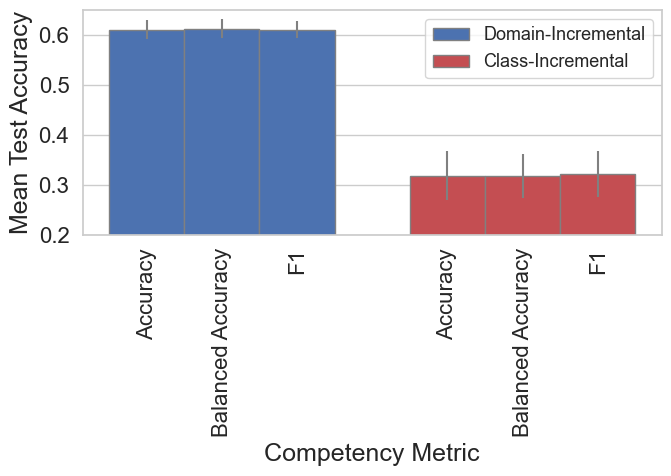

In [305]:
DI_accuracy_mean = np.mean(
    domain_inc_avgs[domain_inc_avgs["name"].str.contains("-accuracy")]["mean"]
)
DI_accuracy_std = np.sqrt(
    np.mean(domain_inc_avgs[domain_inc_avgs["name"].str.contains("-accuracy")]["std"] ** 2)
)
print("DI_accuracy_mean: ", f"{DI_accuracy_mean:.3f}", "+-", f"{DI_accuracy_std:.3f}")

DI_balanced_accuracy_mean = np.mean(
    domain_inc_avgs[domain_inc_avgs["name"].str.contains("balanced_accuracy")]["mean"]
)

DI_balanced_accuracy_std = np.sqrt(
    np.mean(
        domain_inc_avgs[domain_inc_avgs["name"].str.contains("balanced_accuracy")]["std"]
        ** 2
    )
)
print(
    "DI_balanced_accuracy_mean: ",
    f"{DI_balanced_accuracy_mean:.3f}",
    "+-",
    f"{DI_balanced_accuracy_std:.3f}",
)

DI_f1_mean = np.mean(domain_inc_avgs[domain_inc_avgs["name"].str.contains("f1")]["mean"])
DI_f1_std = np.sqrt(
    np.mean(domain_inc_avgs[domain_inc_avgs["name"].str.contains("f1")]["std"] ** 2)
)
print("DI_f1_mean: ", f"{DI_f1_mean:.3f}", "+-", f"{DI_f1_std:.3f}")

CI_accuracy_mean = np.mean(
    class_inc_avgs[class_inc_avgs["name"].str.contains("-accuracy")]["mean"]
)
CI_accuracy_std = np.sqrt(
    np.mean(class_inc_avgs[class_inc_avgs["name"].str.contains("-accuracy")]["std"] ** 2)
)
print("CI_accuracy_mean: ", f"{CI_accuracy_mean:.3f}", "+-", f"{CI_accuracy_std:.3f}")

CI_balanced_accuracy_mean = np.mean(
    class_inc_avgs[class_inc_avgs["name"].str.contains("balanced_accuracy")]["mean"]
)

CI_balanced_accuracy_std = np.sqrt(
    np.mean(
        class_inc_avgs[class_inc_avgs["name"].str.contains("balanced_accuracy")]["std"]
        ** 2
    )
)

print(
    "CI_balanced_accuracy_mean: ",
    f"{CI_balanced_accuracy_mean:.3f}",
    "+-",
    f"{CI_balanced_accuracy_std:.3f}",
)

CI_f1_mean = np.mean(class_inc_avgs[class_inc_avgs["name"].str.contains("f1")]["mean"])
CI_f1_std = np.sqrt(
    np.mean(class_inc_avgs[class_inc_avgs["name"].str.contains("f1")]["std"] ** 2)
)
print("CI_f1_mean: ", f"{CI_f1_mean:.3f}", "+-", f"{CI_f1_std:.3f}")

# plot the values on one grouped bar chart

plt.figure(figsize=(7, 5))
barWidth = 1

bars1 = [DI_accuracy_mean, DI_balanced_accuracy_mean, DI_f1_mean]
bars2 = [CI_accuracy_mean, CI_balanced_accuracy_mean, CI_f1_mean]

stds1 = [DI_accuracy_std, DI_balanced_accuracy_std, DI_f1_std]
stds2 = [CI_accuracy_std, CI_balanced_accuracy_std, CI_f1_std]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + len(bars1) + 1 for x in range(len(bars2))]
total_bars = len(bars1) + len(bars2)

# Make the plot
plt.bar(
    r1, bars1, color="b", width=barWidth, edgecolor="grey", label="Domain-Incremental", yerr=stds1, ecolor="grey"
)
plt.bar(
    r2, bars2, color="r", width=barWidth, edgecolor="grey", label="Class-Incremental", yerr=stds2, ecolor="grey"
)

# Create names on the x-axis. One name for each bar in the first group, two names for each bar in the second group
names = ["Accuracy", "Balanced Accuracy", "F1", "", "Accuracy", "Balanced Accuracy", "F1"]
x_tick_locations = np.arange(total_bars+1)
plt.xticks(x_tick_locations, names, rotation=90)

# remove vertical grid lines
plt.grid(axis="x")

# increase font size of x labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#increase the font size of the labels on the x-axis
plt.xlabel("Competency Metric", fontsize=18)
plt.ylabel("Mean Test Accuracy", fontsize=18)

# increase font size of legend
plt.legend(fontsize=13, loc="upper right")
plt.ylim(0.2, 0.65)

plt.tight_layout()
plt.show()